In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import math
import collections
import glob
import os
%matplotlib inline

In [2]:
import pandas as pd
xl = pd.ExcelFile("./high-resolutiondata/1/parameters.xlsx")

In [3]:
fluo_area = xl.parse("Sheet1")['Fluo area'].as_matrix()
images_name = xl.parse("Sheet1")['Bin ID'].as_matrix()
fluo_area = fluo_area.reshape(-1,1)

### show the plot with histogram

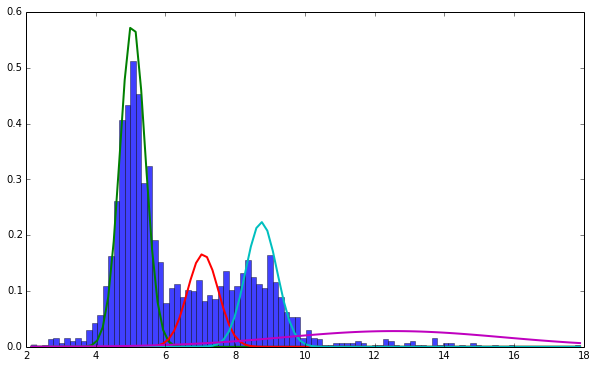

In [4]:
nclass = 4

gmm = GaussianMixture(n_components=nclass, covariance_type='full')
gmm.fit(fluo_area)

weights      = gmm.weights_
means        = gmm.means_.reshape(nclass)
convariances = gmm.covariances_.reshape(nclass)

def gaussian(x, weights, mu, sig):
    return weights * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(fluo_area, 100, normed=1, facecolor='blue', alpha=0.75, linewidth=0.5)
for w, mu, sig in zip(weights, means, convariances):
    plt.plot(bins, gaussian(bins, w, mu, sig), linewidth=2)

plt.show()

### Calculate the labels

In [5]:
y_labels = gmm.predict(fluo_area)
collections.Counter(y_labels)

Counter({0: 1134, 1: 301, 2: 439, 3: 49})

* Plot with labeled hist

In [6]:
zip(fluo_area, y_labels)[:6]

[(array([ 5.25154164]), 0),
 (array([ 4.72190258]), 0),
 (array([ 8.81287356]), 2),
 (array([ 5.78826916]), 0),
 (array([ 5.2142412]), 0),
 (array([ 6.14869404]), 0)]

In [7]:
data = [fluo_area[y_labels==i] for i in range(0,4)]

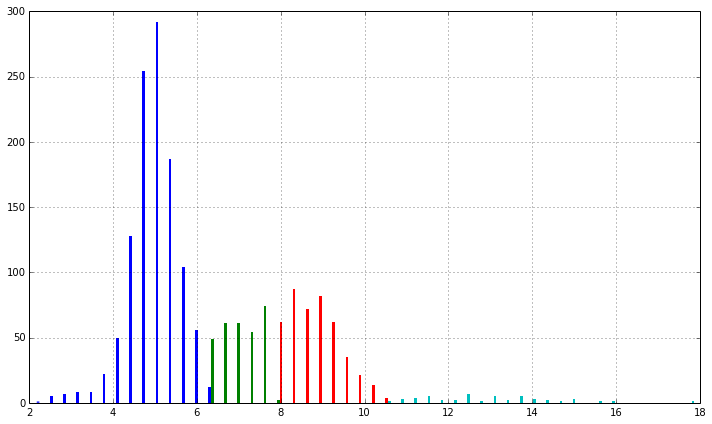

In [8]:
fig = plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(data, bins=50, histtype='bar', linewidth=0)
# for w, mu, sig in zip(weights, means, convariances):
#     plt.plot(bins, gaussian(bins, w, mu, sig), linewidth=2)

plt.grid()
fig.tight_layout()
plt.show()

In [9]:
filelist = glob.glob('/home/uranus/Work-2017/high-resolutiondata/1/*.jpg')
filelist[:6]

['/home/uranus/Work-2017/high-resolutiondata/1/1515-1_image.jpg',
 '/home/uranus/Work-2017/high-resolutiondata/1/1256-1_image.jpg',
 '/home/uranus/Work-2017/high-resolutiondata/1/399-1_image.jpg',
 '/home/uranus/Work-2017/high-resolutiondata/1/905-1_image.jpg',
 '/home/uranus/Work-2017/high-resolutiondata/1/446-1_image.jpg',
 '/home/uranus/Work-2017/high-resolutiondata/1/1317-1_image.jpg']

In [10]:
data_labels_pair = [] 
for imgfile in filelist:
    index = int(imgfile.split('/')[-1].split('-')[0])
    label = y_labels[images_name == index][0]
    data_labels_pair.append((imgfile, label))

In [11]:
data_labels_pair[:6]

[('/home/uranus/Work-2017/high-resolutiondata/1/1515-1_image.jpg', 0),
 ('/home/uranus/Work-2017/high-resolutiondata/1/1256-1_image.jpg', 2),
 ('/home/uranus/Work-2017/high-resolutiondata/1/399-1_image.jpg', 1),
 ('/home/uranus/Work-2017/high-resolutiondata/1/905-1_image.jpg', 1),
 ('/home/uranus/Work-2017/high-resolutiondata/1/446-1_image.jpg', 0),
 ('/home/uranus/Work-2017/high-resolutiondata/1/1317-1_image.jpg', 3)]

* write to file

In [12]:
with open('imagefile.txt', 'w') as outfile:
    for item in data_labels_pair:
        outfile.write(item[0] + ' ' + str(item[1]) + '\n')

* save images to folder

In [13]:
# !mkdir high-resolutiondata/cellcycle
# !mkdir high-resolutiondata/cellcycle/0
# !mkdir high-resolutiondata/cellcycle/1
# !mkdir high-resolutiondata/cellcycle/2
# !mkdir high-resolutiondata/cellcycle/3

In [20]:
path = 'high-resolutiondata'
if os.path.exists(os.path.join(path, 'cellcycle')):
    print('The cellcycle dir is already existed.')
else:
    os.system("mkdir -p " + os.path.join(path, 'cellcycle'))


for _class in ['0','1','2','3']:
    if os.path.exists(os.path.join(path, _class, 'cellcycle')):
        print('The cellcycle dir is already existed.')
    else:
        os.system("mkdir -p " + os.path.join(path, 'cellcycle', _class))

In [21]:
for i in range(len(data_labels_pair)):
    if int(data_labels_pair[i][1]) == 0:
        save_path =  os.path.join(path, 'cellcycle', '0')
        os.system('cp ' + data_labels_pair[i][0] + ' ' + save_path)
    if int(data_labels_pair[i][1]) == 1:
        save_path =  os.path.join(path, 'cellcycle', '1')
        os.system('cp ' + data_labels_pair[i][0] + ' ' + save_path)
    if int(data_labels_pair[i][1]) == 2:
        save_path =  os.path.join(path, 'cellcycle', '2')
        os.system('cp ' + data_labels_pair[i][0] + ' ' + save_path)
    if int(data_labels_pair[i][1]) == 3:
        save_path =  os.path.join(path, 'cellcycle', '3')
        os.system('cp ' + data_labels_pair[i][0] + ' ' + save_path)